### Model trained with the intention of future input ~74% accurate

In [3]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [5]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [6]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

data = raw.drop(columns=dropping)

In [9]:
ratings_of_partner = ["attr", "sinc", "intel", "fun", "amb"]
training_features = ["dec"] + ratings_of_partner

training = pd.DataFrame(data, columns=training_features)
training = training.dropna()

In [10]:
label = training_features[0]

X = training.drop(columns=label).values
y = training[label].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

### Dense NN

In [21]:
model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer="normal",
                input_dim=X_train.shape[1]))
model.add(Dense(50, activation='relu', kernel_initializer="normal"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, y_train, epochs=15, verbose=0)

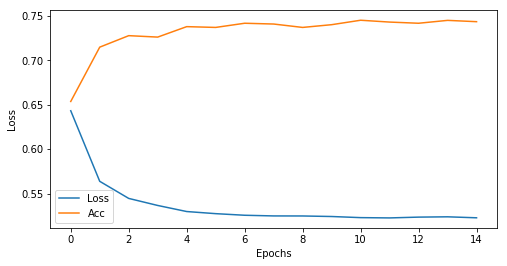

In [23]:
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Loss")
plt.plot(hist.history["acc"], label="Acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
y_pred = model.predict(X_test, batch_size=128)

In [25]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc}, loss: {loss}")

757/757 [==============================] - 0s 150us/step
Accuracy: 0.735799207791312, loss: 0.5432832801279021


In [28]:
knockdown = np.array([0.89806022, 1.06741549, 0.98790808, 1.26951799, 0.75705166])

In [40]:
user_input = np.array([9,9,9,9,9]) - knockdown

In [41]:
y_pred = model.predict(user_input.reshape(1,5))

In [42]:
y_pred

array([[0.73723847]], dtype=float32)

In [43]:
from keras.models import load_model

model.save('input_model.h5')

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')